# NYC Yellow Taxi Fare Analysis
This notebook analyzes fare data from NYC Yellow Taxi trips in 2017. It includes data cleaning, descriptive statistics, visualizations, and hypothesis testing.

Initial dataset shape: (22699, 18)
   payment_type  fare_amount
0             1         13.0
1             1         16.0
2             1          6.5
3             1         20.5
4             2         16.5

--- Descriptive Statistics ---
Credit Card Mean Fare:  13.432387629406369
Cash Mean Fare:  12.215227085053675
Credit Card Std Dev:  13.84904444745719
Cash Std Dev:  11.689866346819874


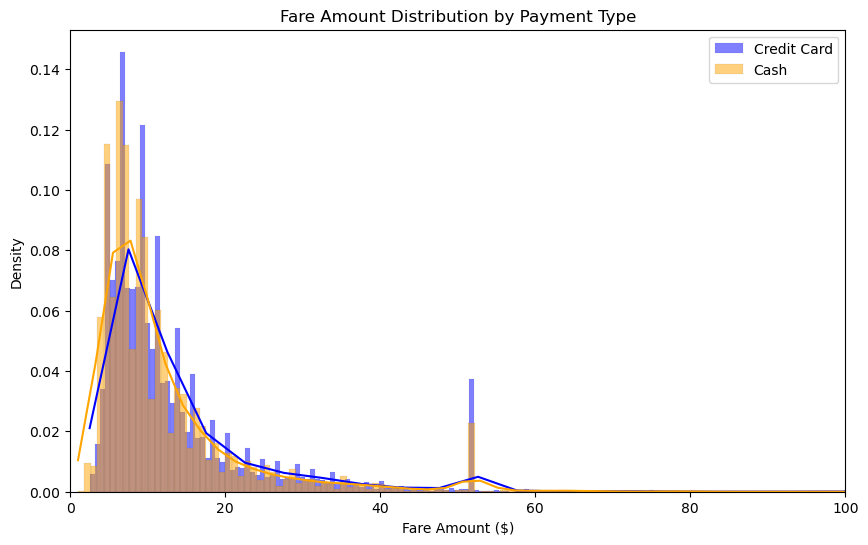


--- Hypothesis Test Result ---
T-statistic: 6.871671010169566
P-value: 6.5699264341219305e-12
Result: Reject the null hypothesis (significant difference in fare amounts)


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (adjust path as needed)
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

# Inspect data
print("Initial dataset shape:", df.shape)
print(df[['payment_type', 'fare_amount']].head())


## Data Cleaning
The dataset is filtered to include only relevant payment types (credit card and cash) and positive fare amounts.

In [6]:
# Filter for relevant payment types
# 1 = Credit card, 2 = Cash
df = df[df['payment_type'].isin([1, 2])]

# Drop rows with missing or negative fare amounts
df = df[(df['fare_amount'] > 0)]

# Split into two groups
credit_card_fares = df[df['payment_type'] == 1]['fare_amount']
cash_fares = df[df['payment_type'] == 2]['fare_amount']


## Descriptive Statistics
Descriptive statistics are calculated for fare amounts by payment type.

In [7]:
# Descriptive statistics
print("\n--- Descriptive Statistics ---")
print("Credit Card Mean Fare: ", credit_card_fares.mean())
print("Cash Mean Fare: ", cash_fares.mean())
print("Credit Card Std Dev: ", credit_card_fares.std())
print("Cash Std Dev: ", cash_fares.std())



--- Descriptive Statistics ---
Credit Card Mean Fare:  13.432387629406369
Cash Mean Fare:  12.215227085053675
Credit Card Std Dev:  13.84904444745719
Cash Std Dev:  11.689866346819874


## Visualizations
Histograms are plotted to compare the distribution of fare amounts for credit card and cash payments.

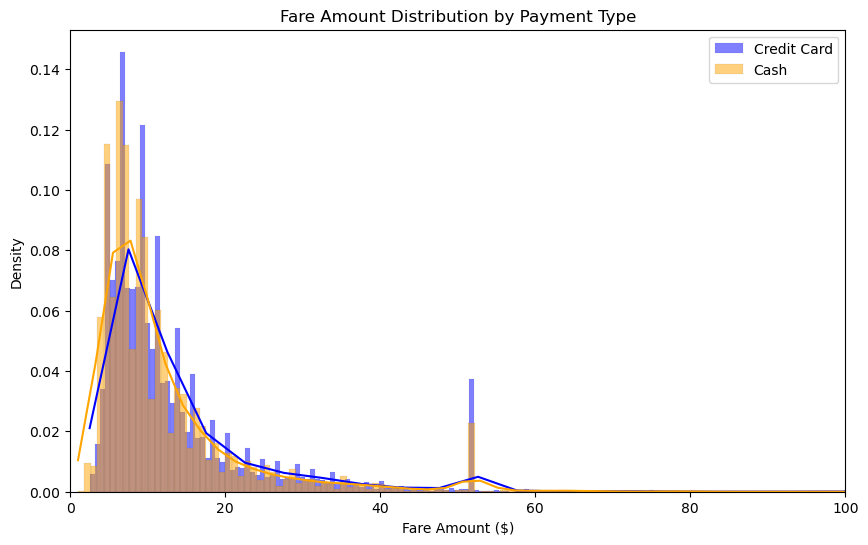

In [8]:
# Visual comparison
plt.figure(figsize=(10, 6))
sns.histplot(credit_card_fares, label='Credit Card', color='blue', kde=True, stat='density')
sns.histplot(cash_fares, label='Cash', color='orange', kde=True, stat='density')
plt.legend()
plt.title('Fare Amount Distribution by Payment Type')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Density')
plt.xlim(0, 100)  # Limit x-axis to focus on typical range
plt.show()


## Hypothesis Testing
A two-sample t-test is conducted to determine if there is a significant difference in fare amounts between payment types.

In [9]:
# Hypothesis Testing (Two-sample t-test)
t_stat, p_value = stats.ttest_ind(credit_card_fares, cash_fares, equal_var=False)  # Welch’s t-test

print("\n--- Hypothesis Test Result ---")
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis (significant difference in fare amounts)")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference)")



--- Hypothesis Test Result ---
T-statistic: 6.871671010169566
P-value: 6.5699264341219305e-12
Result: Reject the null hypothesis (significant difference in fare amounts)
